In [2]:
!python3 --version

Python 3.10.9


In [3]:
import os
import re
import pandas as pd

from pathlib import Path

In [4]:
# Dataset Paths

DATASET_PATH = Path('C:/Users/astit/Desktop/Semester 7/NLP/shared-task_constraint-2022-master/shared-task_constraint-2022-master/dataset')
IMAGES_DIR_PATH = os.path.join(DATASET_PATH,'images')

TRAIN_CSV_PATH = os.path.join(DATASET_PATH,'train.csv')
VALIDATE_CSV_PATH = os.path.join(DATASET_PATH,'val.csv')

In [5]:
test_df = pd.read_json('C:/Users/astit/Desktop/Semester 7/NLP/shared-task_constraint-2022-master/shared-task_constraint-2022-master/dataset/train.json')
test_df.head()

0     \
OCR      Bernie or Elizabeth?\nBe informed.Compare them...   
image                                   covid_memes_18.png   
hero                                                    []   
villain                                                 []   
victim                                                  []   

                                                      1     \
OCR      Extending the\nBrexit deadline until\nOctober ...   
image                                   covid_memes_19.png   
hero                                                    []   
villain                                    [uk government]   
victim                                                  []   

                                                      2     \
OCR      kwai\ngkwa 0964\n#nnevvy\napplause to Thais fr...   
image                                  covid_memes_252.png   
hero                                               [thais]   
villain                                                 []   
victim                                                  []   

                                                      3     \
OCR      So, I order this\nfoce mask to\nprotect ogains...   
image                                  covid_memes_255.png   
hero                                                    []   
villain                                            [china]   
victim                                                  []   

                                                      4     \
OCR      best candidate for\nJA\n2020\njoe biden\nKamal...   
image                                   covid_memes_20.png   
hero                                           [joe biden]   
villain                                                 []   
victim                                                  []   

                                                      5     \
OCR      BREAKING NEWS!\nEL\nCH\nAND MANNEQUINS THEN HE...   
image                                   covid_memes_56.png   
hero                                                    []   
villain                                     [donald trump]   
victim                                                  []   

                                                      6     \
OCR      MASK\nTRUMP\nTRUMP\nDEN CE\nHelp your child fi...   
image                                   covid_memes_60.png   
hero                                        [donald trump]   
villain                                     [barack obama]   
victim                                                  []   

                                                      7     \
OCR      #Hantavirus\nChina discovered new virus\nWhole...   
image                                  covid_memes_259.png   
hero                                                    []   
villain                                            [china]   
victim                                     [people, world]   

                                                      8     \
OCR      When it's finally 2020 but you realize\nthat b...   
image                                  covid_memes_263.png   
hero                                                    []   
villain                                                 []   
victim                                                  []   

                                                      9     ...  \
OCR      nese NewYear\nChira's attermpt\nat controlling...  ...   
image                                  covid_memes_268.png  ...   
hero                                                    []  ...   
villain                                [wuhan coronavirus]  ...   
victim                                             [china]  ...   

                                                      2690  \
OCR      This is Called\nWork From Home\nWHAT MY CO-WOR...   
image                                 covid_memes_5256.png   
hero                                                    []   
villain                                       

In [6]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
train_df

OCR                image  \
0     Bernie or Elizabeth? Be informed. Compare them...   covid_memes_18.png   
1     Extending the Brexit deadline until October 31...   covid_memes_19.png   
2     kwai gkwa 0964 #nnevvy applause to Thais from ...  covid_memes_252.png   
3     So, I order this face mask to protect against ...  covid_memes_255.png   
4     best candidate for JA 2020 joe biden Kamala ha...   covid_memes_20.png   
...                                                 ...                  ...   
5547  Trump could shoot someone on the Senate floor ...       memes_5039.png   
5548  MANY PEOPLE ASK ME WHY ALL MY SCHOOL RECORDS A...       memes_2635.png   
5549  my bes friend my mother consclence my therapis...       memes_1384.png   
5550  THE N-WORD PASS Signed and approved by Beak Ob...        memes_944.png   
5551  Biden-Obama Memes 300. Funny & Hillarious Meme...        memes_982.png   

               hero            villain victim  \
0               NaN                NaN    NaN   
1               NaN  ['uk government']    NaN   
2         ['thais']                NaN    NaN   
3               NaN          ['china']    NaN   
4     ['joe biden']                NaN    NaN   
...             ...                ...    ...   
5547            NaN   ['donald trump']    NaN   
5548            NaN                NaN    NaN   
5549            NaN                NaN    NaN   
5550            NaN                NaN    NaN   
5551            NaN                NaN    NaN   

                                                  other  
0                ['bernie sanders', 'elizabeth warren']  
1                                                   NaN  
2                                         ['hong kong']  
3         ['face mask', 'made in china', 'coronavirus']  
4         ['bernie sanders', 'kamala harris', 'tiktok']  
...                                                 ...  
5547                     ['senate floor', 'republican']  
5548              ['school', 'university', 'joe biden']  
5549  ['msnbc', 'bernie sanders', 'democratic party'...  
5550                                   ['barack obama']  
5551  ['biden obama meme', 'john robinson', 'memes',...  

[5552 rows x 6 columns]

In [7]:
train_df = train_df.fillna(value=0)
train_df.head()

OCR                image  \
0  Bernie or Elizabeth? Be informed. Compare them...   covid_memes_18.png   
1  Extending the Brexit deadline until October 31...   covid_memes_19.png   
2  kwai gkwa 0964 #nnevvy applause to Thais from ...  covid_memes_252.png   
3  So, I order this face mask to protect against ...  covid_memes_255.png   
4  best candidate for JA 2020 joe biden Kamala ha...   covid_memes_20.png   

            hero            villain victim  \
0              0                  0      0   
1              0  ['uk government']      0   
2      ['thais']                  0      0   
3              0          ['china']      0   
4  ['joe biden']                  0      0   

                                           other  
0         ['bernie sanders', 'elizabeth warren']  
1                                              0  
2                                  ['hong kong']  
3  ['face mask', 'made in china', 'coronavirus']  
4  ['bernie sanders', 'kamala harris', 'tiktok']

In [8]:
!pip install opencv-python

In [9]:
import matplotlib.pyplot as plt
import cv2 as cv

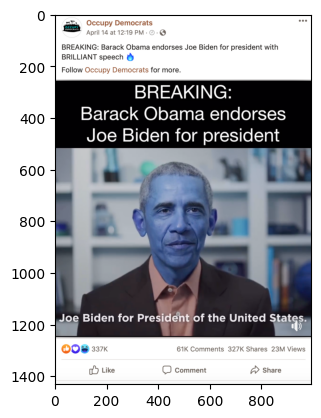

In [12]:
img = cv.imread('C:/Users/astit/Desktop/Semester 7/NLP/shared-task_constraint-2022-master/shared-task_constraint-2022-master/dataset/images/memes_25.png')
plt.imshow(img)